In [263]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from collections import Counter
# data preprocessing
from sklearn.preprocessing import StandardScaler
# data splitting
from sklearn.model_selection import train_test_split
# data modeling
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
#ensembling

# QN-1: Load in the data. The target column should be considered as whether a patient will develop heart disease or not.

In [264]:
heart = pd.read_csv("heart.csv")
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Qn-2: Explore the data. Notice all columns are numerical. Therefore separate the continuous from the discrete features.

In [265]:
heart.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [266]:
heart.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [267]:
heart.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [268]:
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [269]:
heart[heart.duplicated()==True]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [270]:
# Initialize data and target
T = heart['target']
F = heart.drop(['target'], axis = 1)

In [271]:
heart.drop_duplicates(inplace=True)
heart[heart.duplicated()==True]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [272]:
numerical = [var for var in F.columns if F[var].dtype!='O']
numerical

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [273]:
#Picking discrete columns from numerical columns
numerical_discrete = []

for var in numerical:
    if len(F[var].unique())<20:
        print(var, ' values: ', F[var].unique())
        numerical_discrete.append(var)
print()
print('There are {} discrete variables'.format(len(numerical_discrete)))
numerical_discrete

sex  values:  [1 0]
cp  values:  [3 2 1 0]
fbs  values:  [1 0]
restecg  values:  [0 1 2]
exang  values:  [0 1]
slope  values:  [0 2 1]
ca  values:  [0 2 1 3 4]
thal  values:  [1 2 3 0]

There are 8 discrete variables


['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

In [274]:
#Picking continuous columns
numerical_continuous = [var for var in numerical if var not in numerical_discrete]
print('There are {} numerical and continuous variables'.format(len(numerical_continuous)))
numerical_continuous

There are 5 numerical and continuous variables


['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Qn-3: Identify any presence of outliers in the continuous features and resolve them using the IQR method.

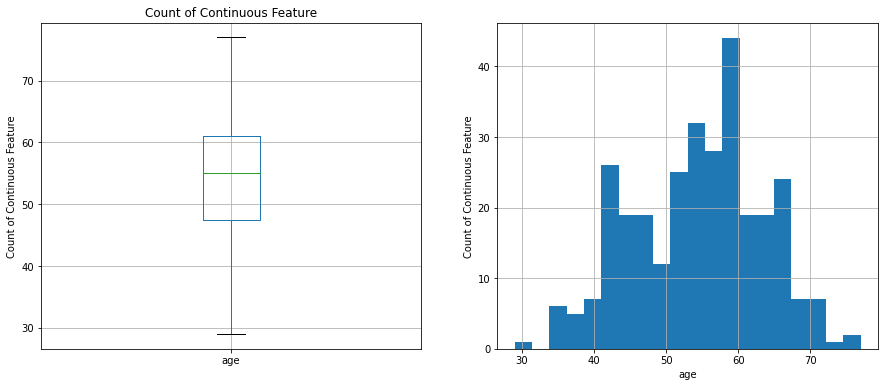

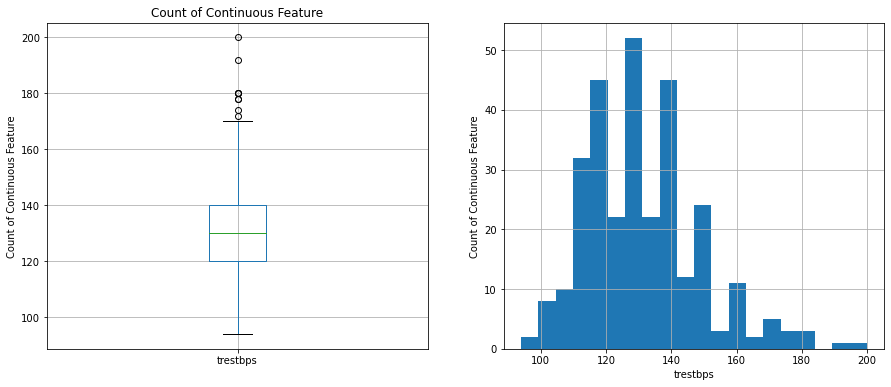

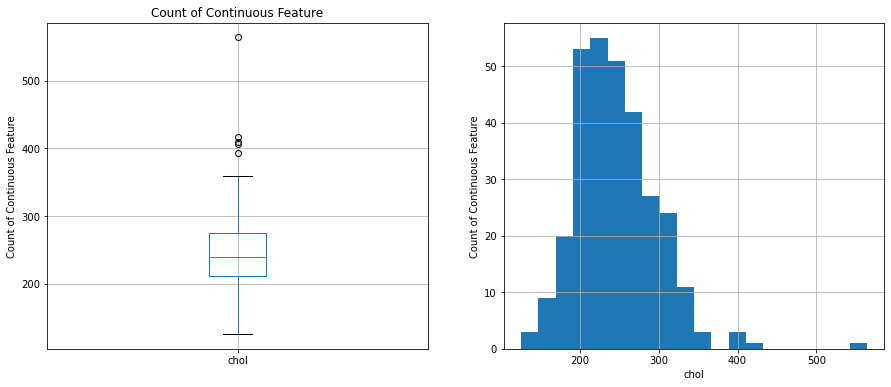

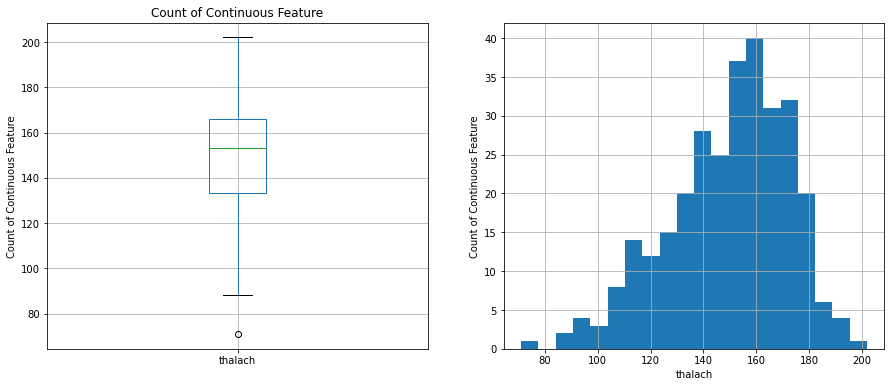

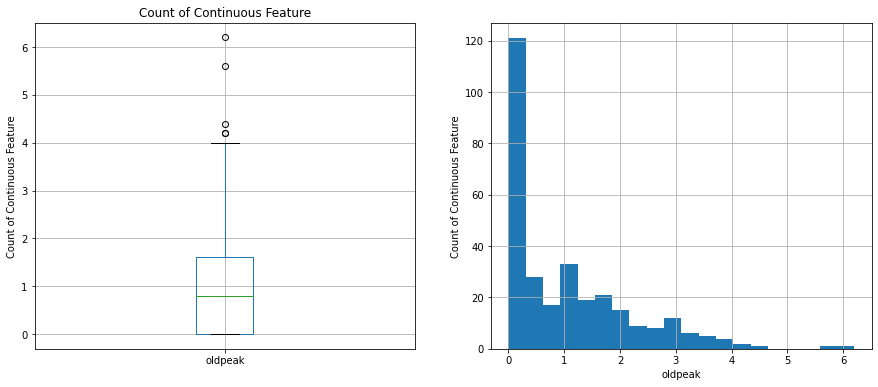

In [275]:
for var in numerical_continuous:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = F.boxplot(column=var)
    fig.set_title('Count of Continuous Feature')
    fig.set_ylabel('Count of Continuous Feature')
    
    plt.subplot(1, 2, 2)
    fig = F[var].hist(bins=20)
    fig.set_ylabel('Count of Continuous Feature')
    fig.set_xlabel(var)

    plt.show()

It is observed that features namely trestbps, chol, thalach, oldpeak have outliers

<AxesSubplot:xlabel='chol'>

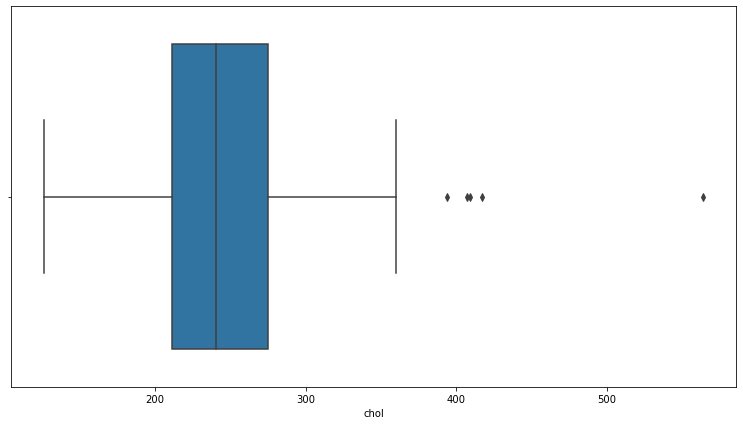

In [276]:
plt.figure(figsize=(13,7))
sns.boxplot(heart.chol)

<AxesSubplot:xlabel='chol'>

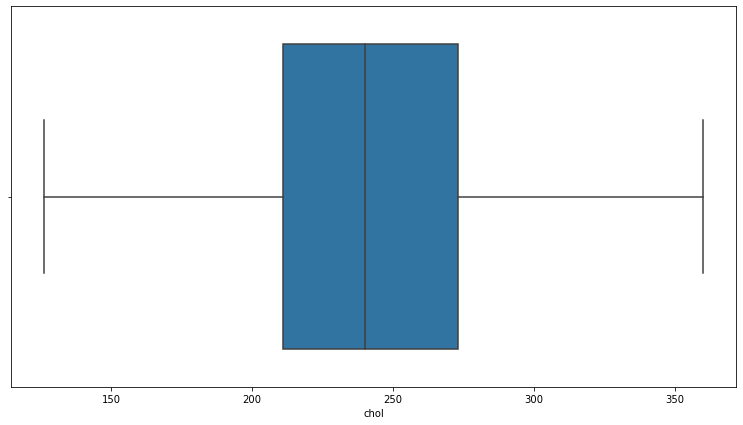

In [277]:

def remove_outlier(col):
    q25 = col.quantile(0.25)
    q75 = col.quantile(0.75)
    iqr = q75 - q25
    cutoff = iqr*1.5
    lower = q25 - cutoff
    upper = q75 + cutoff
    return lower, upper

lower, upper = remove_outlier(heart.chol)

heart = heart.loc[(heart.chol > lower) & (heart.chol < upper)]
plt.figure(figsize=(13,7))
sns.boxplot(heart.chol)

<AxesSubplot:xlabel='trestbps'>

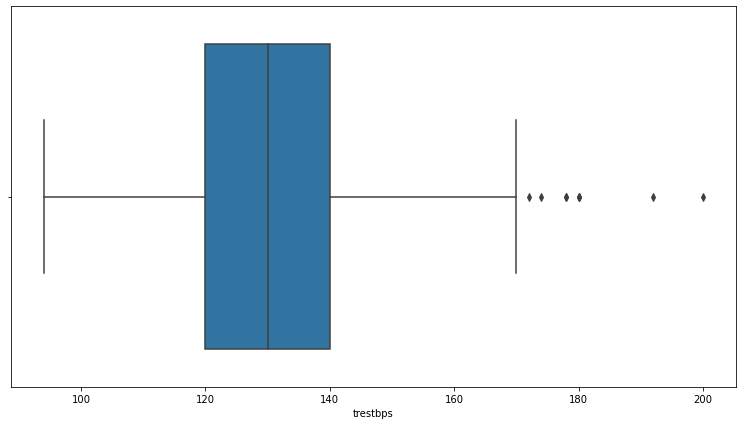

In [278]:
plt.figure(figsize=(13,7))
sns.boxplot(heart.trestbps)

<AxesSubplot:xlabel='trestbps'>

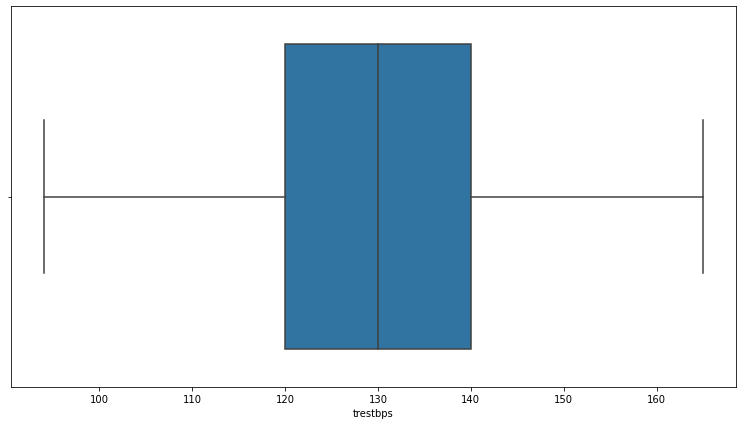

In [279]:
def remove_outlier(col):
    q25 = col.quantile(0.25)
    q75 = col.quantile(0.75)
    iqr = q75 - q25
    cutoff = iqr*1.5
    lower = q25 - cutoff
    upper = q75 + cutoff
    return lower, upper

lower, upper = remove_outlier(heart.trestbps)

heart = heart.loc[(heart.trestbps > lower) & (heart.trestbps < upper)]
plt.figure(figsize=(13,7))
sns.boxplot(heart.trestbps)

<AxesSubplot:xlabel='thalach'>

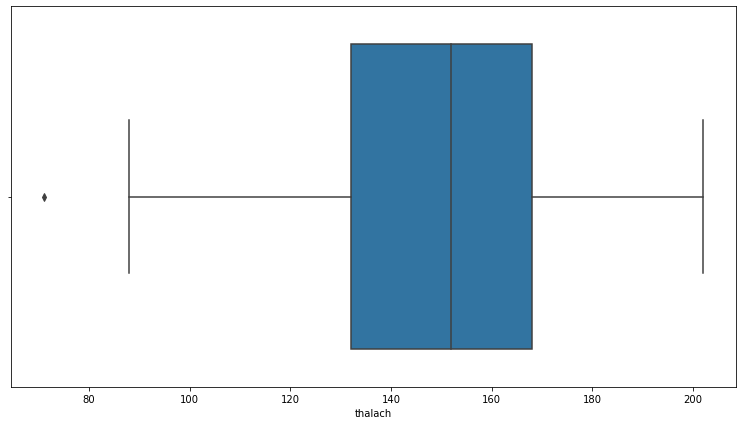

In [280]:
plt.figure(figsize=(13,7))
sns.boxplot(heart.thalach)

<AxesSubplot:xlabel='thalach'>

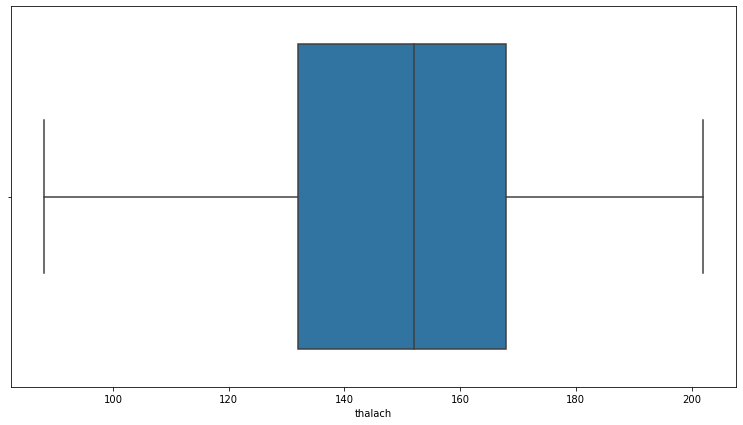

In [281]:
def remove_outlier(col):
    q25 = col.quantile(0.25)
    q75 = col.quantile(0.75)
    iqr = q75 - q25
    cutoff = iqr*1.5
    lower = q25 - cutoff
    upper = q75 + cutoff
    return lower, upper

lower, upper = remove_outlier(heart.thalach)

heart = heart.loc[(heart.thalach > lower) & (heart.thalach < upper)]
plt.figure(figsize=(13,7))
sns.boxplot(heart.thalach)

<AxesSubplot:xlabel='oldpeak'>

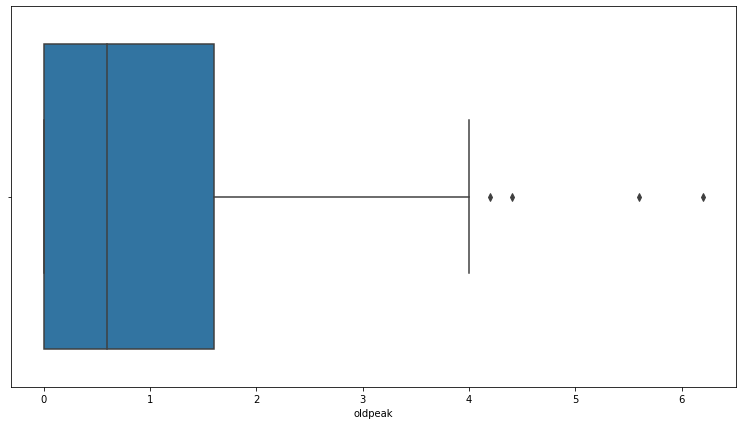

In [282]:
plt.figure(figsize=(13,7))
sns.boxplot(heart.oldpeak)

<AxesSubplot:xlabel='oldpeak'>

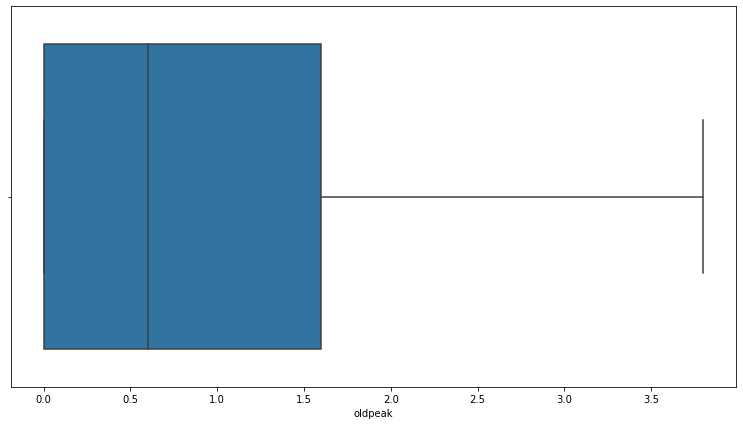

In [283]:
def remove_outlier(col):
    q25 = col.quantile(0.25)
    q75 = col.quantile(0.75)
    iqr = q75 - q25
    cutoff = iqr*1.5
    lower = q25 - cutoff
    upper = q75 + cutoff
    return lower, upper

lower, upper = remove_outlier(heart.oldpeak)

heart = heart.loc[(heart.oldpeak > lower) & (heart.oldpeak < upper)]
plt.figure(figsize=(13,7))
sns.boxplot(heart.oldpeak)

In [284]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.00000,278.000000,278.000000,278.000000,278.000000,278.000000
mean,53.931655,0.697842,0.982014,129.269784,242.165468,0.140288,0.532374,149.982014,0.31295,0.929496,1.435252,0.694245,2.291367,0.564748
std,9.161547,0.460022,1.021272,14.733342,44.544076,0.347912,0.514092,22.875184,0.46453,1.001007,0.595817,0.985474,0.605031,0.496684
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,88.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,46.250000,0.000000,0.000000,120.000000,210.250000,0.000000,0.000000,132.250000,0.00000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,54.000000,1.000000,1.000000,130.000000,239.500000,0.000000,1.000000,153.000000,0.00000,0.600000,1.000000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,269.750000,0.000000,1.000000,168.000000,1.00000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,165.000000,360.000000,1.000000,2.000000,202.000000,1.00000,3.800000,2.000000,4.000000,3.000000,1.000000


# Qn-4: Binned the continuous column values apart from the column ‘oldpeak’.

In [285]:
heart2=heart.copy()
heart2.head()
bins = [0, 25, 50, 75, 100]

#heart2['binnedage', 'binnedtrestbps', 'binnedchol', 'binnedthalach'] = pd.cut(heart2['age', 'trestbps', 'chol', 'thalach'], bins)
heart2['binnedage'] = pd.cut(heart2['age'], bins)
heart2['binnedtrestbps'] = pd.cut(heart2['trestbps'], bins)
heart2['binnedchol'] = pd.cut(heart2['chol'], bins)
heart2['binnedthalach'] = pd.cut(heart2['thalach'], bins)
print (heart2)


     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target binnedage binnedtrestbps binnedchol binnedthalach  
0     

# Qn-5: Separate the features from the labels and use the most appropriate feature selection technique(s).

In [286]:
X = heart.drop("target",1)
y= heart["target"] 

In [287]:
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 0.004809
Best score using built-in LassoCV: 0.514518


In [288]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 11 variables and eliminated the other 2 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

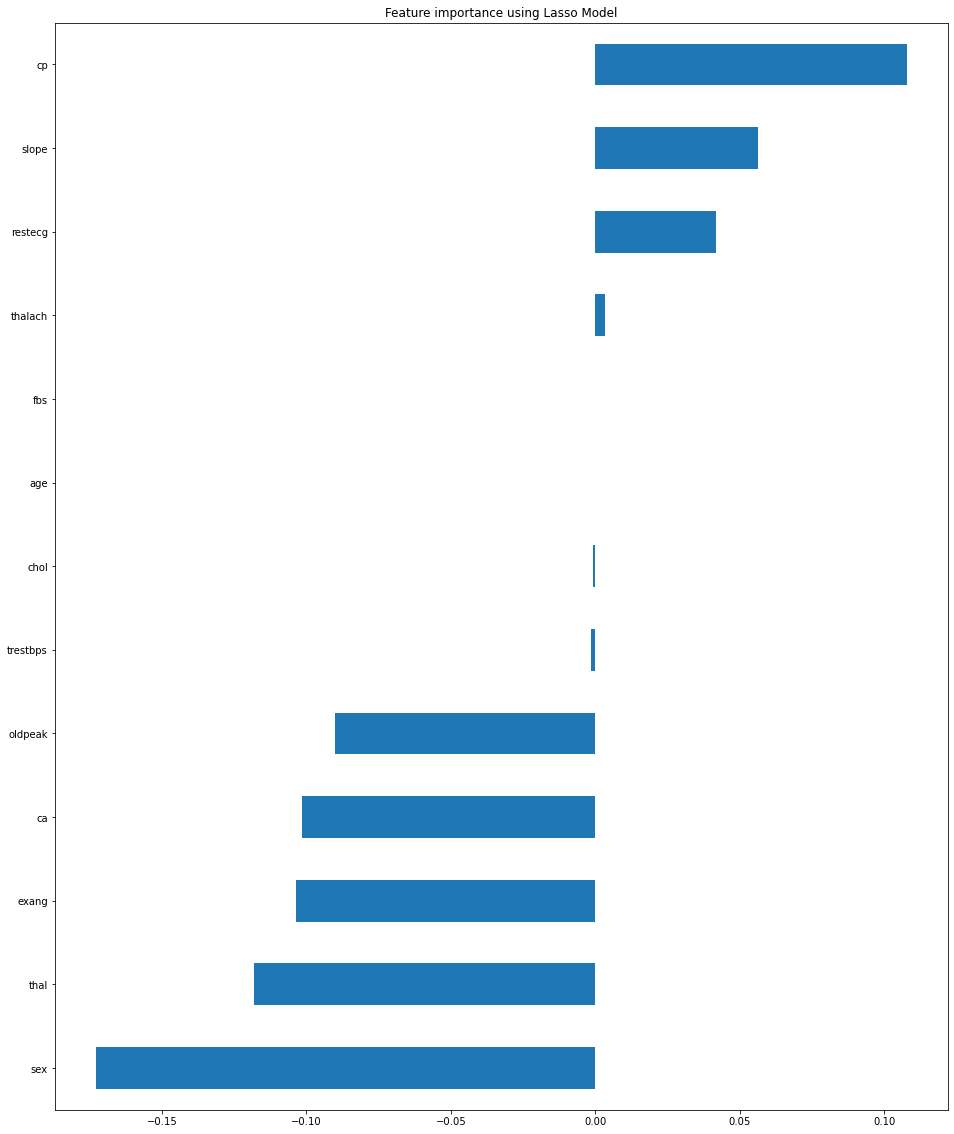

In [289]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (16.0, 20.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

lasso has dropped fbs and age features

In [290]:
X = heart.drop(labels=['fbs','age','target'], axis = 1)
y = heart['target']
X.describe().T

,count,mean,std,min,25%,50%,75%,max
sex,278.0,0.697842,0.460022,0.0,0.00,1.0,1.00,1.0
cp,278.0,0.982014,1.021272,0.0,0.00,1.0,2.00,3.0
trestbps,278.0,129.269784,14.733342,94.0,120.00,130.0,140.00,165.0
chol,278.0,242.165468,44.544076,126.0,210.25,239.5,269.75,360.0
restecg,278.0,0.532374,0.514092,0.0,0.00,1.0,1.00,2.0
thalach,278.0,149.982014,22.875184,88.0,132.25,153.0,168.00,202.0
exang,278.0,0.312950,0.464530,0.0,0.00,0.0,1.00,1.0
oldpeak,278.0,0.929496,1.001007,0.0,0.00,0.6,1.60,3.8
slope,278.0,1.435252,0.595817,0.0,1.00,1.0,2.00,2.0
ca,278.0,0.694245,0.985474,0.0,0.00,0.0,1.00,4.0


# Qn-6: Slice the data and scale the features.

In [291]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Qn-7: Identify the data if the data is balanced. If not, sample the data using the most appropriate method keeping the size of the data in mind.

In [292]:
print(y_test.unique())
Counter(y_train)

[0 1]


Counter({0: 97, 1: 125})

In [293]:
heart.target.value_counts()

1    157
0    121
Name: target, dtype: int64

In [294]:
cmap = sns.diverging_palette(250, 15, s=75, l=40,n=9, center="dark")

In [295]:
heart = heart.sample(frac=1)

# total heart disease data classes 157 rows.
non_hd_heart = heart.loc[heart['target'] == 0]
hd_heart = heart.loc[heart['target'] == 1][:121]

#b_heart = pd.concat([non_hd_heart,hd_heart])
b_heart=b_heart.drop(labels=['fbs','age'], axis = 1)

# Shuffle dataframe rows
b_heart = b_heart.sample(frac=1, random_state=7)

b_heart.head()

KeyError: "['fbs' 'age'] not found in axis"

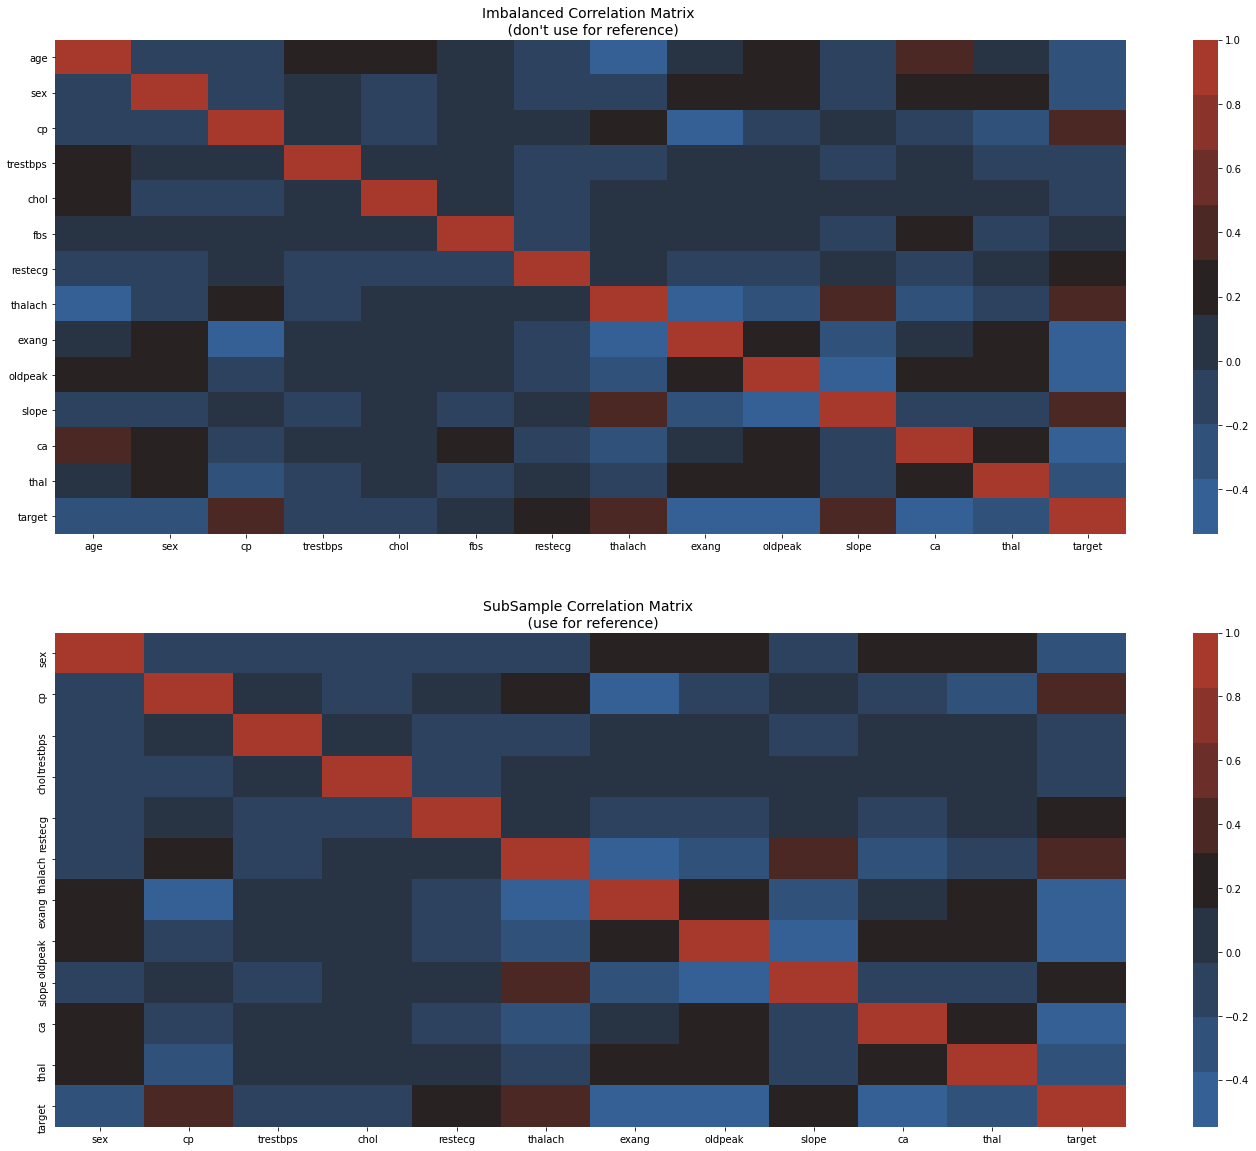

In [296]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Entire DataFrame
corr = heart.corr()
sns.heatmap(corr, cmap=cmap, annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)


sub_sample_corr = b_heart.corr()
sns.heatmap(sub_sample_corr, cmap=cmap, annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

Distribution of the Classes in the new balanced dataset
1    0.5
0    0.5
Name: target, dtype: float64


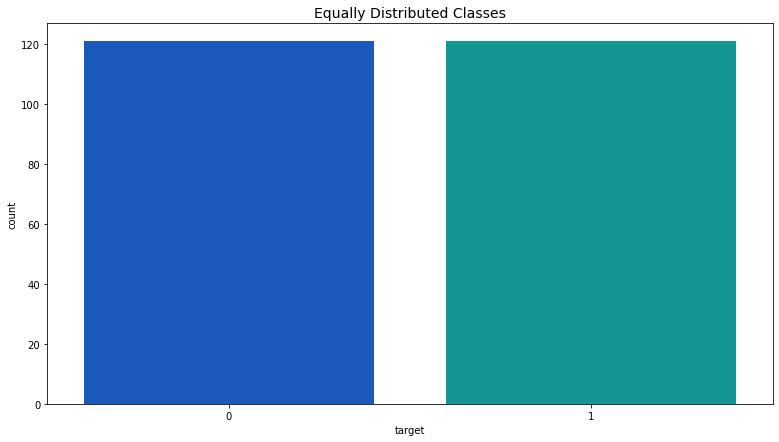

In [297]:
print('Distribution of the Classes in the new balanced dataset')
print(b_heart['target'].value_counts()/len(b_heart))
plt.figure(figsize=(13,7))
sns.countplot('target', data=b_heart, palette='winter')
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

# Qn-8: Using at least 4 classification methods, identify the best machine learning model using their training and testing accuracy scores.

In [310]:

X=b_heart.iloc[:,:-1]
y=b_heart.iloc[:,-1]

In [299]:
X.describe()

,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,ca,thal
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,0.702479,0.904959,129.628099,242.450413,0.520661,147.776860,0.338843,0.998347,1.392562,0.727273,2.322314
std,0.458115,1.024217,14.742398,44.939882,0.516920,22.926904,0.474297,1.027100,0.589347,0.985370,0.627382
min,0.000000,0.000000,100.000000,126.000000,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,120.000000,210.250000,0.000000,131.000000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,1.000000,0.000000,130.000000,241.500000,1.000000,151.000000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,1.000000,2.000000,140.000000,271.000000,1.000000,164.750000,1.000000,1.600000,2.000000,1.000000,3.000000
max,1.000000,3.000000,165.000000,360.000000,2.000000,192.000000,1.000000,3.800000,2.000000,4.000000,3.000000


In [323]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=20)

In [324]:
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [325]:
from sklearn.model_selection import cross_val_score
for key, classifier in classifiers.items():
    classifier.fit(X_train, Y_train)
    training_score = cross_val_score(classifier, X_train, Y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 83.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 61.0 % accuracy score
Classifiers:  SVC Has a training score of 68.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 77.0 % accuracy score


In [326]:
from sklearn.model_selection import cross_val_score
for key, classifier in classifiers.items():
    classifier.fit(X_test, Y_test)
    test_score = cross_val_score(classifier, X_test, Y_test, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a testing score of", round(test_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a testing score of 72.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a testing score of 51.0 % accuracy score
Classifiers:  SVC Has a testing score of 61.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a testing score of 74.0 % accuracy score


The best performing model from both the training and test scores is Logistic Regression with scores of 83% and 72% respectively

# Qn-9: Hyper parameter tune the best model using grid search to identify the best performing model.

In [327]:

from sklearn.model_selection import GridSearchCV

#Logistic Regression
lr = LogisticRegression()
lr_params = {"penalty": ['l2'], "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                  "solver": ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
grid_logistic = GridSearchCV(lr, lr_params)
grid_logistic.fit(X_train, Y_train)
lr_best = grid_logistic.best_estimator_

In [329]:
cross_val_score(lr_best, X, y)

array([0.81632653, 0.83673469, 0.89583333, 0.83333333, 0.77083333])

The Model has a score of 81.6%

In [330]:
X_train.shape

(193, 11)

# Qn-10: Redefine the model instance based on the grid search results, train it and evaluate it using:

In [335]:
#from sklearn.linear_model import LogisticRegression

# Setup random seed
np.random.seed(42)


#Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Institate and fit the model (on the training set)
#model = LogisticRegression()
lr_best.fit(X_train, y_train)

# Make predictions
y_preds = lr_best.predict(X_test)
lr_best.score(X_test, y_test)

0.8571428571428571

# Qn-10-(a) A classification report.

In [336]:
from sklearn.metrics import classification_report
print("Classification Report")
print(classification_report(y_test, y_preds))

Classification Report
              precision    recall  f1-score   support

           0       0.89      0.86      0.87        28
           1       0.82      0.86      0.84        21

    accuracy                           0.86        49
   macro avg       0.85      0.86      0.85        49
weighted avg       0.86      0.86      0.86        49



# Qn-10-(b) A visual representation and well labelled confusion matrix.

In [337]:
from sklearn.metrics import confusion_matrix

y_preds = lr_best.predict(X_test)
cm_lr = confusion_matrix(y_test, y_preds)
lr_acc_score = accuracy_score(y_test, y_preds)
print("confussion matrix")
print(cm_lr)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')

confussion matrix
[[24  4]
 [ 3 18]]


Accuracy of Logistic Regression: 85.71428571428571 



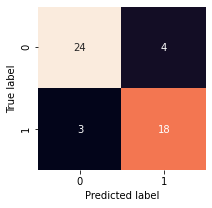

In [338]:
import seaborn as sns 
def plot_conf_mat(conf_mat):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(conf_mat,
                     annot=True, # Annotate the boxes 
                     cbar=False)
    plt.xlabel('Predicted label')
    plt.ylabel('True label');

conf_mat=confusion_matrix(y_test, y_preds)

plot_conf_mat(conf_mat)

# Qn-10-(c) AUC score. (Explain the score in a markdown cell.)

In [339]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_preds)

0.8571428571428572

The higher AUC score of 83.93%, signifies that the model is better at predicting true and false values



In [342]:
from sklearn.metrics import roc_curve

# Make predictions with probabilities
y_probs = lr_best.predict_proba(X_test)

# Keep the probabilites of the positive class only
y_probs = y_probs[:, 1]

# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Check the false positive rate
fpr

array([0.        , 0.        , 0.        , 0.03571429, 0.03571429,
       0.07142857, 0.07142857, 0.14285714, 0.14285714, 0.25      ,
       0.25      , 0.35714286, 0.35714286, 0.57142857, 0.57142857,
       1.        ])

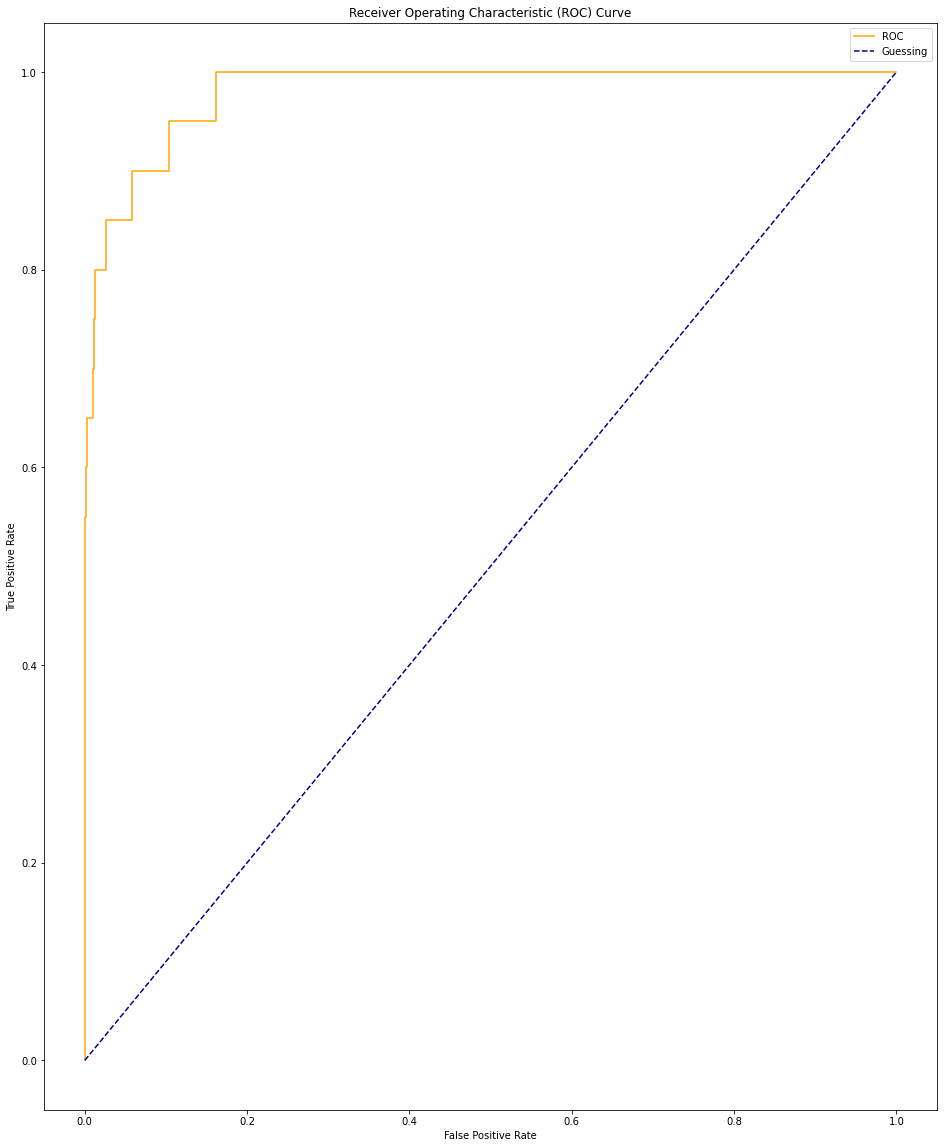

In [260]:

import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positve rate (fpr) and 
    true postive rate (tpr) of a classifier.
    """
    # Plot ROC curve
    plt.plot(fpr, tpr, color='orange', label='ROC')
    # Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Guessing')
    # Customize the plot
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

# Qn-11: Based on the results on the ROC curve, which threshold would be ideal given the nature of the data? (Explain in a markdown cell.)

Best Threshold=0.007766, G-Mean=0.923


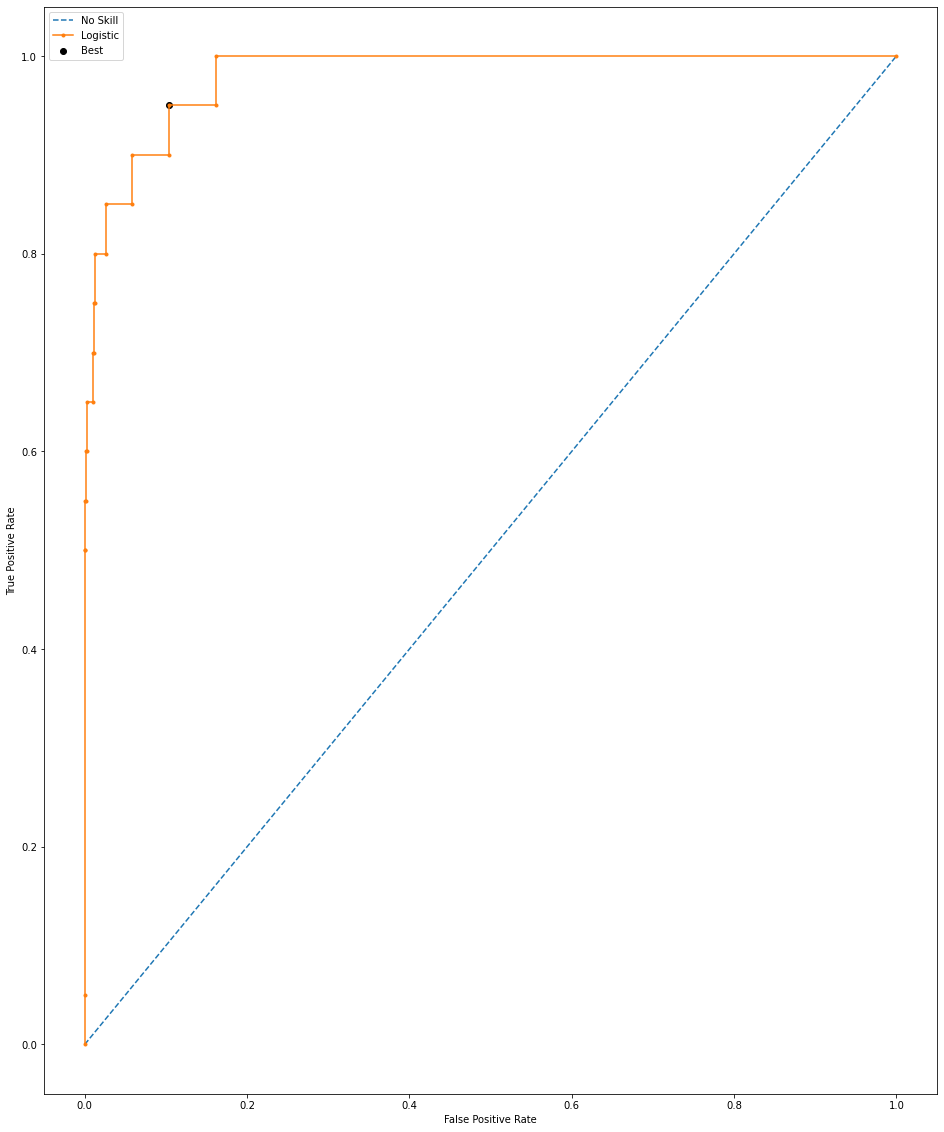

In [343]:
# roc curve for logistic regression model with optimal threshold
from numpy import sqrt
from numpy import argmax
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from matplotlib import pyplot
# generate dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
 n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.2, random_state=2, stratify=y)
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
# predict probabilities
yhat = model.predict_proba(testX)
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(testy, yhat)
# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

The ideal threshold is around 0.007766 with mean of around 0.923 (Top left corner region) since in this region it will predict most of the true positives and less of false positives



# Qn-12: Save the model as ‘classification_model’.

In [344]:
# Save the model as serialized object pickle
import pickle
with open('classification_model.pkl', 'wb') as file:
      pickle.dump(lr, file)